<a href="https://colab.research.google.com/github/the-redlord/comp455/blob/master/Project/Copy_of_cifar10model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1: import

import keras


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import  Conv2D, MaxPooling2D


#Now the dataset
from keras.datasets import cifar10


In [ ]:
#Load the dataset
(X_Train, Y_Train),(X_Test, Y_Test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


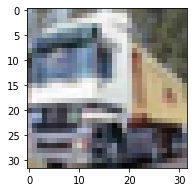

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(330+1+1)
plt.imshow(X_Train[1])
plt.show()

In [ ]:
#Step 2: Data pre-processiing 


#Normalize the dataset
X_Train = X_Train.astype('float32')
X_Test = X_Test.astype('float32')

X_Train = X_Train/255.0
X_Test= X_Test/255.0

In [ ]:
#Now one hot encoding on Y_Test

#convert vectors into Binary class matrices

Y_Train=keras.utils.to_categorical(Y_Train)
Y_Test=keras.utils.to_categorical(Y_Test)

In [ ]:
#CHeck the shape of Y_Train
num_classes = Y_Train.shape[1]

In [ ]:
#Step 3: Model Creation

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), padding = 'same', activation='relu',
          kernel_constraint = maxnorm(3)))

model.add(Dropout(0.2))
model.add(Conv2D (32, (3, 3) , activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation= 'relu'))

#Configure the optimizer

sgd = SGD (learning_rate=0.01, momentum=0.9, decay= (0.01/25), nesterov = False)

#compile the model

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
model.fit(X_Train, Y_Train, validation_data=(X_Test,Y_Test), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2868 - accuracy: 0.1481 - val_loss: 2.5864 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3039 - accuracy: 0.1324 - val_loss: 2.2418 - val_accuracy: 0.1777
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2232 - accuracy: 0.1682 - val_loss: 2.1884 - val_accuracy: 0.1888
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1866 - accuracy: 0.1844 - val_loss: 2.1521 - val_accuracy: 0.2042
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1933 - accuracy: 0.1751 - val_loss: 2.1642 - val_accuracy: 0.2188
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1896 - accuracy: 0.1793 - val_loss: 2.1565 - val_accuracy: 0.2222
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1547 - accuracy: 0.2060 - val_loss: 2.1151 - val_ac

In [ ]:
#Step 4: Evaluation
loss, accuracy_= model.evaluate(X_Test, Y_Test)
print("Accuracy of this program is: ", accuracy_*100)

313/313 [==============================] - 1s 2ms/step - loss: 2.2661 - accuracy: 0.1001
Accuracy of this program is:  10.010000318288803


In [ ]:
  #